# Simple example of the evolutionary optimization framework

This notebook provides a simple example for the use of the evolutionary optimization framework builtin to the library. Under the hood, the implementation of the evolutionary algorithm is powered by `deap` and `pypet` cares about the parallelization and storage of the simulation data for us. 

Here we demonstrate how to fit parameters of a the evaluation function `optimize_me` which simply computes the distance of the parameters to the unit circle and returns this as the `fitness_tuple` that DEAP expects.

In [9]:
# change into root directory to the project
import os
if os.getcwd().split("/")[-1] == "examples":
    print("chdir")
    os.chdir('..')

In [ ]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu
import neurolib.utils.functions as func

import random

def optimize_me(traj):
    global evolution
    ind = evolution.getIndividualFromTraj(traj)
    print("Hello, I am {}".format(ind.id))
    print("You can also call me {}, or simply ({:.2}, {:.2}).".format(ind.params, ind.x, ind.y))
    
    # let's make a circle
    computation_result = abs((ind.x**2 + ind.y**2) - 1)
    # DEAP wants a tuple as fitness, ALWAYS!
    fitness_tuple = (computation_result ,)
    
    # we also require a dictionary with at least a single result for storing the results in the hdf
    result_dict = {"result" : [computation_result]}
    
    return fitness_tuple, result_dict

    
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, 
                      weightList = [-1.0], POP_INIT_SIZE=10, POP_SIZE = 6, NGEN=4)
# info: chose POP_INIT_SIZE=100, POP_SIZE = 50, NGEN=10 for real exploration, 
# values here are low for testing.

evolution.run(verbose = False)

In [ ]:
traj = evolution.loadResults()

Parameters dictribution (Generation 9):
x: 	 mean: -0.1364,	 std: 0.757
y: 	 mean: 0.1293,	 std: 0.6604
There are 50 valid individuals
Mean score across population: -0.18


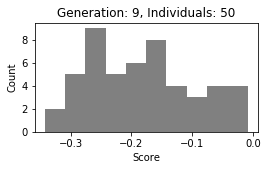

<Figure size 432x288 with 0 Axes>

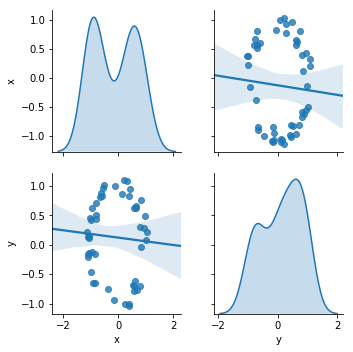

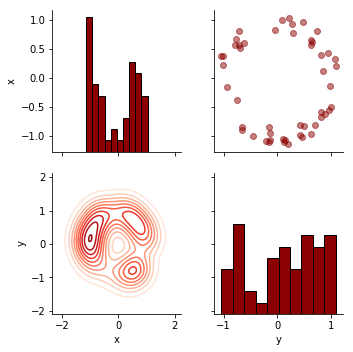

--------------------------
Best 20 individuals:
Printing 20 individuals
Individual 0 pars x -0.1316, y 0.9956
	Fitness values:  0.0086
Individual 1 pars x -0.5822, y 0.8252
	Fitness values:  0.0199
Individual 2 pars x 1.006, y 0.08834
	Fitness values:  0.0207
Individual 3 pars x 0.6692, y -0.7625
	Fitness values:  0.0292
Individual 4 pars x 0.5642, y -0.7859
	Fitness values:  0.0641
Individual 5 pars x 0.9252, y 0.2763
	Fitness values:  0.0677
Individual 6 pars x -0.9561, y -0.1292
	Fitness values:  0.0692
Individual 7 pars x 0.2278, y -1.011
	Fitness values:  0.0748
Individual 8 pars x -0.8213, y 0.4995
	Fitness values:  0.0759
Individual 9 pars x -0.1545, y -0.9421
	Fitness values:  0.0886
Individual 10 pars x 0.4339, y 0.9489
	Fitness values:  0.0887
Individual 11 pars x -0.6789, y 0.8117
	Fitness values:  0.1198
Individual 12 pars x 1.035, y 0.2217
	Fitness values:  0.1212
Individual 13 pars x -0.9756, y 0.4212
	Fitness values:  0.1293
Individual 14 pars x -1.058, y 0.1096
	Fitness

In [13]:
evolution.info(plot=True)

Text(0, 0.5, 'Score')

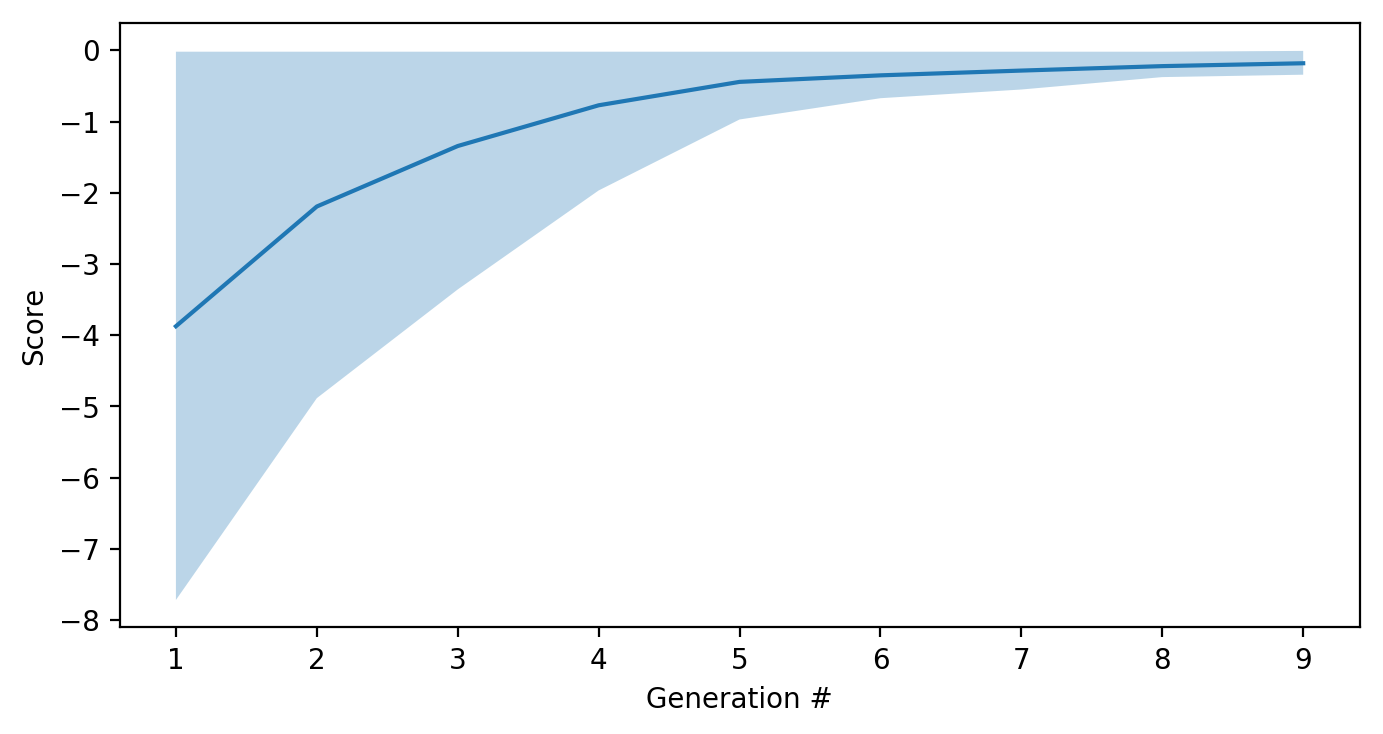

In [14]:
gens, all_scores = evolution.getScoresDuringEvolution()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")